In [11]:
import pandas as pd



In [13]:
# Load the uploaded CSV file to inspect its structure
file_path = '/mnt/data/bank.csv'
data = pd.read_csv('bank.csv')

# Display the first few rows of the dataset
data.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


In [15]:
data = pd.read_csv('bank.csv', delimiter=';')

# Display the first few rows of the properly parsed dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


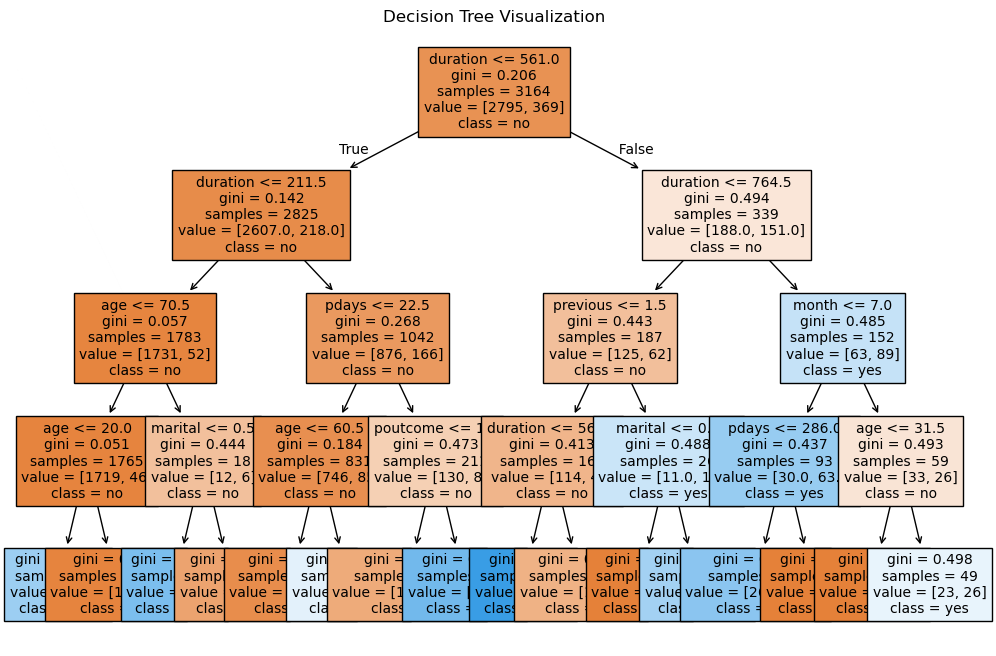

'|--- duration <= 561.00\n|   |--- duration <= 211.50\n|   |   |--- age <= 70.50\n|   |   |   |--- age <= 20.00\n|   |   |   |   |--- class: 1\n|   |   |   |--- age >  20.00\n|   |   |   |   |--- class: 0\n|   |   |--- age >  70.50\n|   |   |   |--- marital <= 0.50\n|   |   |   |   |--- class: 1\n|   |   |   |--- marital >  0.50\n|   |   |   |   |--- class: 0\n|   |--- duration >  211.50\n|   |   |--- pdays <= 22.50\n|   |   |   |--- age <= 60.50\n|   |   |   |   |--- class: 0\n|   |   |   |--- age >  60.50\n|   |   |   |   |--- class: 1\n|   |   |--- pdays >  22.50\n|   |   |   |--- poutcome <= 1.50\n|   |   |   |   |--- class: 0\n|   |   |   |--- poutcome >  1.50\n|   |   |   |   |--- class: 1\n|--- duration >  561.00\n|   |--- duration <= 764.50\n|   |   |--- previous <= 1.50\n|   |   |   |--- duration <= 563.50\n|   |   |   |   |--- class: 1\n|   |   |   |--- duration >  563.50\n|   |   |   |   |--- class: 0\n|   |   |--- previous >  1.50\n|   |   |   |--- marital <= 0.50\n|   |   

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Preprocessing: Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'y':  # Exclude the target column for now
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

# Encode the target column ('y')
target_encoder = LabelEncoder()
data['y'] = target_encoder.fit_transform(data['y'])

# Separate features and target variable
X = data.drop(columns=['y'])
y = data['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)

# Generate Python code to visualize and interpret the decision tree
fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=target_encoder.classes_, filled=True, fontsize=10, ax=ax)
plt.title("Decision Tree Visualization")
plt.show()

# Output the textual representation of the tree
decision_tree_text = export_text(clf, feature_names=list(X.columns))
decision_tree_text